In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import zipfile as zip
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mikitadubovik","key":"4bb7f20667c695e50f46ad3ee57de20d"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d datamunge/sign-language-mnist

 66% 41.0M/62.6M [00:01<00:01, 15.3MB/s]
100% 62.6M/62.6M [00:01<00:00, 38.2MB/s]


In [0]:
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_CHANNELS=1
BATCH_SIZE=32
EPOCHS=30

In [0]:
with zip.ZipFile("/content/sign-language-mnist.zip") as zip_file:
    zip_file.extractall("/content/storage/sign-language-mnist")

In [0]:
def read_dataset(path):
    dataset=np.genfromtxt(path,delimiter=",",skip_header=1)

    split_result=np.split(dataset, [1], axis=1)
    Y=split_result[0]
    X=split_result[1]    
    return X,Y

In [0]:
X,Y=read_dataset("/content/storage/sign-language-mnist/sign_mnist_train.csv")

In [0]:
X_train, X_valid, Y_train, Y_valid=train_test_split(X, Y, test_size=0.2, random_state=42)
X_train=X_train.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT))
X_valid=X_valid.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT))
X_train=X_train/255
X_valid=X_valid/255

In [0]:
X_gray_train=X_train.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))
X_gray_valid=X_valid.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))

In [11]:
print(X_gray_train.shape)
print(X_gray_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)
(21964, 1)
(5491, 1)


In [0]:
def show_batch(image_batch,label_batch):    
    plt.style.use('grayscale')
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,8,n+1)
        plt.imshow(image_batch[n])
        plt.title(label_batch[n])
        plt.axis('off')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


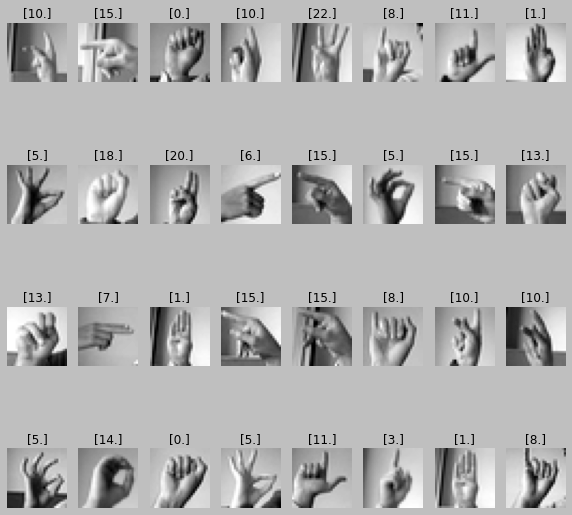

In [13]:
show_batch(X_gray_train[:BATCH_SIZE,:,:,:].reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH), Y_train[:BATCH_SIZE])

In [0]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8,(3,3),activation='relu',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    tf.keras.layers.AveragePooling2D(),

    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.AveragePooling2D(),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.AveragePooling2D(),

    tf.keras.layers.Flatten(),        
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [15]:
history=model.fit(X_gray_train,Y_train,epochs=EPOCHS,validation_data=(X_gray_valid,Y_valid))

Epoch 1/30
687/687 [==============================] - 2s 3ms/step - loss: 2.4641 - accuracy: 0.2202 - val_loss: 1.7830 - val_accuracy: 0.4240
Epoch 2/30
687/687 [==============================] - 2s 3ms/step - loss: 1.5988 - accuracy: 0.4628 - val_loss: 1.2043 - val_accuracy: 0.6077
Epoch 3/30
687/687 [==============================] - 2s 3ms/step - loss: 1.2013 - accuracy: 0.5875 - val_loss: 0.8818 - val_accuracy: 0.7099
Epoch 4/30
687/687 [==============================] - 2s 3ms/step - loss: 0.9840 - accuracy: 0.6597 - val_loss: 0.6773 - val_accuracy: 0.7762
Epoch 5/30
687/687 [==============================] - 2s 3ms/step - loss: 0.8241 - accuracy: 0.7068 - val_loss: 0.6322 - val_accuracy: 0.7999
Epoch 6/30
687/687 [==============================] - 2s 3ms/step - loss: 0.7265 - accuracy: 0.7425 - val_loss: 0.4718 - val_accuracy: 0.8443
Epoch 7/30
687/687 [==============================] - 2s 3ms/step - loss: 0.6332 - accuracy: 0.7727 - val_loss: 0.3837 - val_accuracy: 0.8742
Epoch 

In [0]:
X_test,Y_test=read_dataset("/content/storage/sign-language-mnist/sign_mnist_test.csv")
X_test=X_test.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT))
X_test=X_test/255

In [0]:
X_gray_test=X_test.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))

In [18]:
print(X_gray_test.shape)
print(Y_test.shape)

(7172, 28, 28, 1)
(7172, 1)


In [19]:
model.evaluate(X_gray_test,Y_test)

225/225 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.9109


[0.3359166085720062, 0.9109035134315491]

In [0]:
img_rotation_generator=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90)

In [0]:
np_rotation_iterator=tf.keras.preprocessing.image.NumpyArrayIterator(X_gray_train,Y_train,img_rotation_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


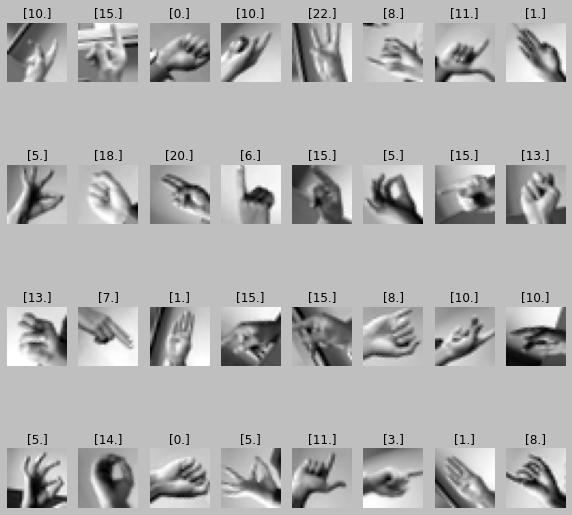

In [22]:
image_batch, label_batch = next(np_rotation_iterator)
show_batch(image_batch.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH), label_batch)

In [0]:
img_shear_generator=tf.keras.preprocessing.image.ImageDataGenerator(shear_range=45.0)

In [0]:
np_shear_iterator=tf.keras.preprocessing.image.NumpyArrayIterator(X_gray_train,Y_train,img_shear_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


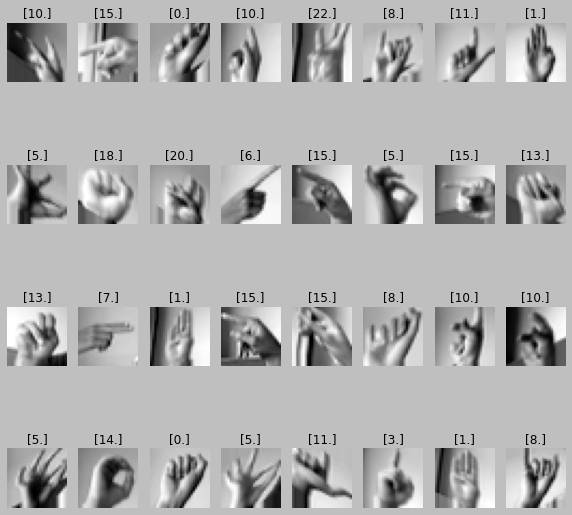

In [25]:
image_batch, label_batch = next(np_shear_iterator)
show_batch(image_batch.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH), label_batch)

In [26]:
history=model.fit(np_rotation_iterator,epochs=history.epoch[-1]+EPOCHS,validation_data=(X_gray_valid,Y_valid),initial_epoch=history.epoch[-1])
model.fit(np_shear_iterator,epochs=history.epoch[-1]+EPOCHS,validation_data=(X_gray_valid,Y_valid),initial_epoch=history.epoch[-1])

Epoch 30/59
687/687 [==============================] - 5s 7ms/step - loss: 2.4282 - accuracy: 0.2906 - val_loss: 0.9743 - val_accuracy: 0.7376
Epoch 31/59
687/687 [==============================] - 5s 7ms/step - loss: 1.9063 - accuracy: 0.3931 - val_loss: 0.7820 - val_accuracy: 0.7722
Epoch 32/59
687/687 [==============================] - 5s 7ms/step - loss: 1.6828 - accuracy: 0.4535 - val_loss: 0.7073 - val_accuracy: 0.7827
Epoch 33/59
687/687 [==============================] - 5s 7ms/step - loss: 1.5494 - accuracy: 0.4926 - val_loss: 0.7237 - val_accuracy: 0.7507
Epoch 34/59
687/687 [==============================] - 5s 7ms/step - loss: 1.4219 - accuracy: 0.5296 - val_loss: 0.6480 - val_accuracy: 0.7836
Epoch 35/59
687/687 [==============================] - 5s 7ms/step - loss: 1.3533 - accuracy: 0.5501 - val_loss: 0.5173 - val_accuracy: 0.8381
Epoch 36/59
687/687 [==============================] - 5s 8ms/step - loss: 1.2857 - accuracy: 0.5664 - val_loss: 0.5453 - val_accuracy: 0.8272

In [27]:
model.evaluate(X_gray_test,Y_test)

225/225 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9462


[0.19994278252124786, 0.9461795687675476]

In [0]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_CHANNELS=3

In [29]:
base_model=tf.keras.applications.VGG16(
    input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
pretrained_model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),    
    tf.keras.layers.Dense(25, activation='softmax')
])

pretrained_model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [31]:
pretrained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
Total params: 14,727,513
Trainable params: 12,825
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
X_rgb_train=np.pad(X_train,((0,0),(2,2),(2,2)))
X_rgb_valid=np.pad(X_valid,((0,0),(2,2),(2,2)))
X_rgb_test=np.pad(X_test,((0,0),(2,2),(2,2)))

In [0]:
X_rgb_train=np.stack((X_rgb_train,)*3, axis=-1)
X_rgb_valid=np.stack((X_rgb_valid,)*3, axis=-1)
X_rgb_test=np.stack((X_rgb_test,)*3, axis=-1)

In [34]:
print(X_rgb_train.shape)
print(X_rgb_valid.shape)
print(X_rgb_test.shape)

(21964, 32, 32, 3)
(5491, 32, 32, 3)
(7172, 32, 32, 3)


In [0]:
np_rotation_iterator=tf.keras.preprocessing.image.NumpyArrayIterator(X_rgb_train,Y_train,img_rotation_generator,batch_size=BATCH_SIZE)
np_shear_iterator=tf.keras.preprocessing.image.NumpyArrayIterator(X_rgb_train,Y_train,img_shear_generator,batch_size=BATCH_SIZE)

In [36]:
history=pretrained_model.fit(X_rgb_train,Y_train,epochs=EPOCHS,validation_data=(X_rgb_valid,Y_valid))

Epoch 1/30
687/687 [==============================] - 10s 14ms/step - loss: 2.0268 - accuracy: 0.5092 - val_loss: 1.4662 - val_accuracy: 0.6274
Epoch 2/30
687/687 [==============================] - 9s 14ms/step - loss: 1.2491 - accuracy: 0.6973 - val_loss: 1.0835 - val_accuracy: 0.7447
Epoch 3/30
687/687 [==============================] - 9s 14ms/step - loss: 0.9791 - accuracy: 0.7653 - val_loss: 0.8963 - val_accuracy: 0.7875
Epoch 4/30
687/687 [==============================] - 10s 14ms/step - loss: 0.8196 - accuracy: 0.8075 - val_loss: 0.7623 - val_accuracy: 0.8226
Epoch 5/30
687/687 [==============================] - 9s 14ms/step - loss: 0.7077 - accuracy: 0.8378 - val_loss: 0.6699 - val_accuracy: 0.8456
Epoch 6/30
687/687 [==============================] - 9s 14ms/step - loss: 0.6224 - accuracy: 0.8579 - val_loss: 0.5990 - val_accuracy: 0.8625
Epoch 7/30
687/687 [==============================] - 10s 14ms/step - loss: 0.5558 - accuracy: 0.8768 - val_loss: 0.5390 - val_accuracy: 0.8

In [37]:
pretrained_model.evaluate(X_rgb_test,Y_test)

225/225 [==============================] - 3s 11ms/step - loss: 0.3458 - accuracy: 0.9063


[0.3457954525947571, 0.906302273273468]

In [38]:
history=pretrained_model.fit(np_rotation_iterator,epochs=history.epoch[-1]+EPOCHS,validation_data=(X_rgb_valid,Y_valid),initial_epoch=history.epoch[-1])
pretrained_model.fit(np_shear_iterator,epochs=history.epoch[-1]+EPOCHS,validation_data=(X_rgb_valid,Y_valid),initial_epoch=history.epoch[-1])

Epoch 30/59
687/687 [==============================] - 13s 19ms/step - loss: 5.1092 - accuracy: 0.3030 - val_loss: 1.9941 - val_accuracy: 0.5327
Epoch 31/59
687/687 [==============================] - 13s 19ms/step - loss: 2.9203 - accuracy: 0.4039 - val_loss: 1.1607 - val_accuracy: 0.6613
Epoch 32/59
687/687 [==============================] - 13s 19ms/step - loss: 2.3839 - accuracy: 0.4534 - val_loss: 0.9151 - val_accuracy: 0.6960
Epoch 33/59
687/687 [==============================] - 13s 19ms/step - loss: 2.0708 - accuracy: 0.4932 - val_loss: 0.7088 - val_accuracy: 0.7532
Epoch 34/59
687/687 [==============================] - 13s 19ms/step - loss: 1.8352 - accuracy: 0.5233 - val_loss: 0.6157 - val_accuracy: 0.7785
Epoch 35/59
687/687 [==============================] - 13s 19ms/step - loss: 1.6797 - accuracy: 0.5416 - val_loss: 0.5823 - val_accuracy: 0.8000
Epoch 36/59
687/687 [==============================] - 14s 20ms/step - loss: 1.5590 - accuracy: 0.5612 - val_loss: 0.5723 - val_ac

In [39]:
pretrained_model.evaluate(X_rgb_test,Y_test)

225/225 [==============================] - 2s 11ms/step - loss: 0.5306 - accuracy: 0.8233


[0.5305625200271606, 0.8233407735824585]